In [1]:
import volta

In this example file, we show how to use different community detection algorithms.  

# Load & Preprocess Network

First step of the pipeline consists in loading the chosen data set.
You can store your networks in any common format, however the VOLTA package requires that the networks are provided as NetworkX Graph objects (refer to its documentation for detailed instructions). Moreover, the networks should be weighted: if you have an unweighted network, then assign all edges the same edge weight. The package assumes "weight" to be the default edge weight label, but this can be set when needed.

An example on how to pre-process a network, stored as an edgelist, is provided below. Different loading and storing examples are provided in the "import and export of networks" jupyter notebook. 

In [2]:
#location where the raw data files are stored, it is set to run from the installation folder
#- if applicable please change or CHANGE to the location of your networks

graph_location = "../networks/edgelists/"

#location where output should be saved
#Please set location
location = ""


In [3]:
import glob
import pandas as pd
import networkx as nx
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [4]:

labels = []
networks_graphs = []
cnt = 0
print("load networks")
#gets all files located in the specified folder that end on .edgelist
#CHANGE the ending if your files end differently
for path in glob.glob(graph_location +"*.edgelist"):
    if cnt == 5:
        #you can specify that only part of the file name should be used as network name for later identification
        name =  path.split("/")[-1].replace(".rds.edgelist", "")


        #read the edgelist file as a dataframe
        fh = pd.read_csv(path, sep="\t")
        #convert it into a NetworkX graph G and specify the column names of the node pairs
        G=nx.from_pandas_edgelist(fh, "V1", "V2")

        #if you have an unweighted network assign all edges the same edge weight - here a value of 1 is assigned
        for u, v, d in G.edges(data=True):
            d['weight'] = 1


        #save the graph objects to a list (only suitable if small networks are processed)
        #this is the main objects used for the examples below, which contains all networks
        networks_graphs.append(G)
        labels.append(name)




        print("loaded", name)
    cnt = cnt + 1

load networks
loaded dasatinib_HA1E


Get the union of all nodes 

In [5]:
nodes = []
for net in networks_graphs:
    for node in net.nodes():
        if node not in nodes:
            nodes.append(node)

The community detection algorithms require you to provide NetworkX graph objects directly

## Some unweighted community detection algorithms

All communiy detection algorithms return a dictionary data format, where keys are node IDs and values are list of communities that node belongs to. In case of overlapping communities this may be more than one community. Three different algorithms are reported hereafter. Unweighted only means that the algorithm does not take the node weight into account but still weighted graphs (as the example networks) can be provided.

In [6]:
asy = volta.communities.async_fluid(networks_graphs[0], k=10, return_object=False)

In [7]:
label = volta.communities.label_propagation(networks_graphs[0], return_object=False)

In [8]:
walktrap = volta.communities.walktrap(networks_graphs[0], return_object=False)

## Some weighted community detection algorithms

Similarly, three differen community detection algorithms are shown for weighted networks. These algorithms will take edge weights into account if available, else every edge will be treated the same. Since our networks all have the same edge weights assigned edge weights have no effect on the outcome of the algorithms.

In [9]:
mod =  volta.communities.greedy_modularity(networks_graphs[0], weights="weight", return_object=False)

In [111]:
leiden = volta.communities.leiden(networks_graphs[0], weights="weight", return_object=False)

In [112]:
louvain = volta.communities.louvain(networks_graphs[0], weights="weight", return_object=False)

We can plot the community distribution over the network.

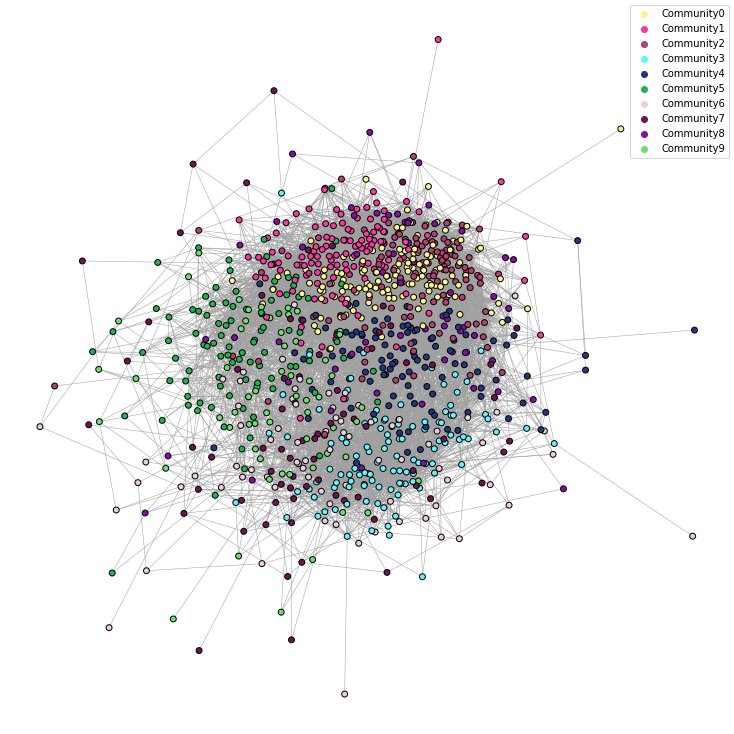

In [77]:
f, p, cl = volta.plotting.plot_communities(networks_graphs[0], dict(asy), node_size=35, width=0.5, figsize=(10,10))

We plot the clustering of another algorithm with the position argument returned by the first plot, so that all nodes are in the same position in the plots.

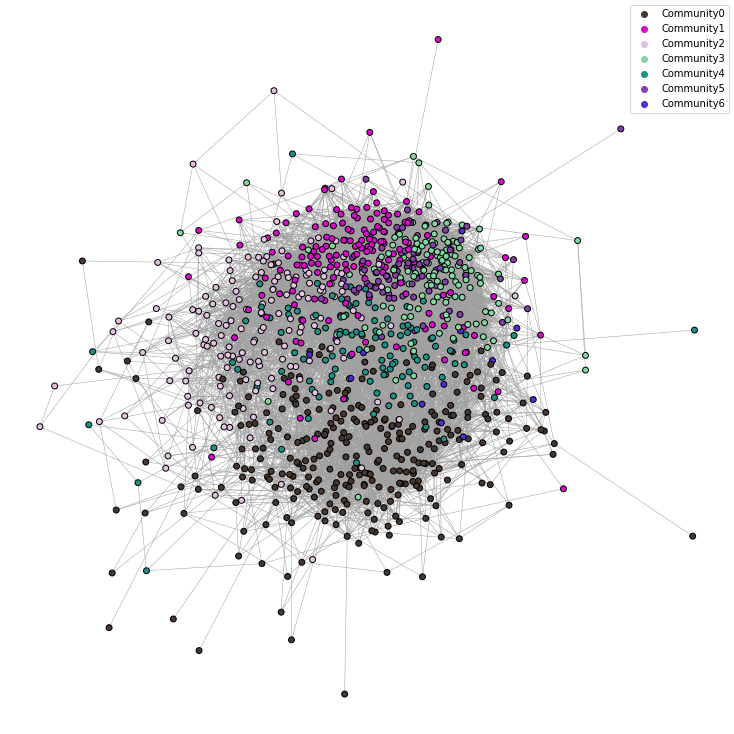

In [79]:
f, p, cl = volta.plotting.plot_communities(networks_graphs[0], dict(leiden),pos=p, node_size=35, width=0.5, figsize=(10,10))

## Ensembl community detection

The ensembl algorithm is based on an adapted implementation developed by Tandon et al. (https://arxiv.org/pdf/1902.04014.pdf)
Here, we want to create an ensembl out of labelpropagation and the louvain algorithm.

Reference: Tandon Aditya, Albeshri Aiiad, Thayananthan Vijey, Alhalabi Wadee, Fortunato Santo; "Fast consensus clustering in complex networks"; Phys. Rev. E, 99 (2019), Article 042301

In [113]:
community_list=[label, leiden, louvain]

Only algorithms that are not requireing connected graphs can be provided as selected algorithms

In [114]:
algorithms = [volta.communities.label_propagation, volta.communities.louvain ]
parameters = [{"return_object": False}, {"weights":"weight","return_object": False}]

In [115]:
consensuscommunities, cons1, consgraph  = volta.communities.fast_consensus(networks_graphs[0], communities = community_list, algorithms=algorithms, parameters=parameters, thresh=0.5, max_iter=10)

start fast consensus
no initial graph provided create from communities
create consensus graph object
transforming initial consensus graph in its communities based on selected treshold
initial removed edges 365753
giving initial graph free
start convergence on  reduced graph
estimating communities  label_propagation
estimating communities  louvain
create consensus graph object
estimating communities  label_propagation
estimating communities  louvain
create consensus graph object
estimating communities  label_propagation
estimating communities  louvain
create consensus graph object
estimating communities  label_propagation
estimating communities  louvain
create consensus graph object
estimating communities  label_propagation
estimating communities  louvain
create consensus graph object
estimating communities  label_propagation
estimating communities  louvain
create consensus graph object
estimating communities  label_propagation
estimating communities  louvain
create consensus graph obje

In [116]:
consensuscommunities

{51203: [0],
 8202: [0],
 8204: [0],
 2063: [0],
 2067: [0],
 23: [0],
 2073: [0],
 4125: [0],
 30: [0],
 94239: [0],
 10276: [0],
 10284: [0],
 6195: [0],
 2108: [0],
 79947: [0],
 4172: [0],
 8270: [0],
 2131: [0],
 10329: [0],
 53340: [0],
 51293: [0],
 4200: [0],
 30836: [0],
 4216: [0],
 6275: [0],
 4232: [0],
 2195: [0],
 4258: [0],
 2222: [0],
 51375: [0],
 10434: [0],
 6342: [0],
 4299: [0],
 8396: [0],
 10447: [0],
 4303: [0],
 211: [0],
 2288: [0],
 10491: [0],
 55556: [0],
 51495: [0],
 22828: [0],
 22841: [0],
 6461: [0],
 10557: [0],
 10559: [0],
 323: [0],
 55631: [0],
 8553: [0],
 55657: [0],
 22889: [0],
 256364: [0],
 6509: [0],
 10606: [0],
 51569: [0],
 10617: [0],
 8573: [0],
 51599: [0],
 10641: [0],
 22930: [0],
 29082: [0],
 8607: [0],
 57761: [0],
 55715: [0],
 10682: [0],
 8634: [0],
 63933: [0],
 55748: [0],
 10695: [0],
 6603: [0],
 2523: [0],
 80347: [0],
 80349: [0],
 23013: [0],
 23014: [0],
 27109: [0],
 2542: [0],
 2548: [0],
 23038: [0],
 23039: [0],
 2

Plot correlation between partitionings

In [119]:
node_list = list(consensuscommunities.keys())
partitionings = [dict(asy), dict(label), dict(walktrap), dict(leiden), dict(louvain), dict(mod), consensuscommunities]
part_labels = ["asy", "label", "walktrap", "leiden", "louvain", "mod", "consensus"]
vect = []

for c in partitionings:
    temp = []
    for n in node_list:
        temp.append(c[n][0])
        
    vect.append(temp)

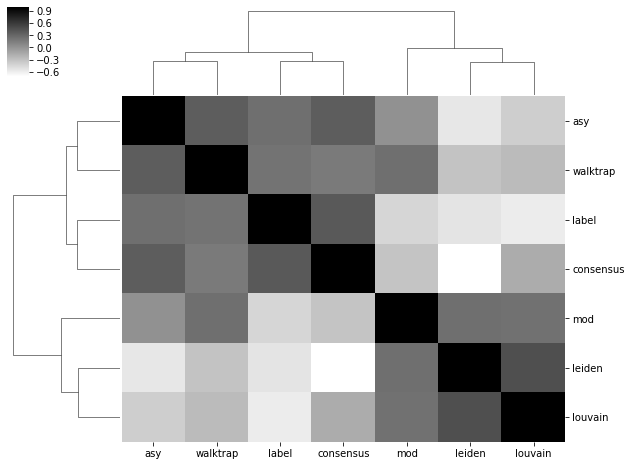

In [125]:
f, c = volta.plotting.plot_correlation_clusterings(vect, xlabels=part_labels, ylabels=part_labels, size=(10,8), cmap="binary")

## Overlapping Communities

Example of an overlapping community detection algorithm. This means that a node can be assigned to more than one community.

In [83]:
angel = volta.communities.angel(networks_graphs[0], return_object=False)

## Some community evaluation metrics

Once the communities have been detected, we can study them through some evaluation metrics and evaluate which algorithm(s) give the "best" paritioning (given the evaluation metrics & your requirements) of your networks.

In [84]:
community_list=[asy, label,  walktrap,  mod, leiden, louvain, consensuscommunities, angel]
algo_labels=["async_fluids","labelpropagation",  "walktrap",  "modularity", "leiden", "louvain", "consensuscommunities", "angel"]

The firt simple consideration refers to the number of communities detected by each algorithm.

In [85]:
for i in range(len(community_list)):
    print("algo ", algo_labels[i], "detects ", volta.communities.get_number_of_communities(community_list[i]), "communities")

algo  async_fluids detects  10 communities
algo  labelpropagation detects  3 communities
algo  walktrap detects  50 communities
algo  modularity detects  6 communities
algo  leiden detects  7 communities
algo  louvain detects  6 communities
algo  consensuscommunities detects  3 communities
algo  angel detects  6 communities


After, we can derive the community size distribution as follows. 

In [86]:
for i in range(len(community_list)):
    print("algorithm ", algo_labels[i], "has a community size distribution of:")
    print(volta.communities.get_number_of_nodes_community(community_list[i], in_detail=False))

algorithm  async_fluids has a community size distribution of:
{'mean': 97.7, 'median': 100.5, 'std': 28.62031135788397, 'kurt': -1.0976256876577088, 'skewness': 0.17197943790451797}
algorithm  labelpropagation has a community size distribution of:
{'mean': 325.6666666666667, 'median': 220, 'std': 387.46139592652753, 'kurt': -1.4999999999999996, 'skewness': 0.46374812126239023}
algorithm  walktrap has a community size distribution of:
{'mean': 19.54, 'median': 3.0, 'std': 41.91108664391165, 'kurt': 7.778718310653062, 'skewness': 2.87576489417891}
algorithm  modularity has a community size distribution of:
{'mean': 162.83333333333334, 'median': 135.5, 'std': 146.16075624690325, 'kurt': -1.334731823035504, 'skewness': 0.3625925546224539}
algorithm  leiden has a community size distribution of:
{'mean': 139.57142857142858, 'median': 142, 'std': 85.33435639267681, 'kurt': -0.09441160033763696, 'skewness': 0.3771773195412751}
algorithm  louvain has a community size distribution of:
{'mean': 1

The average internal degree for the individual communities are returned in the sc object.

In [87]:
for i in range(len(community_list)):
    print("algo ", algo_labels[i], "has a community internal degree distribution of:")
    sc, dist = volta.communities.average_internal_degree(community_list[i], networks_graphs[0])
    print(dist)

algo  async_fluids has a community internal degree distribution of:
{'mean': 12.332273095792711, 'median': 10.894726407613007, 'std': 8.770267392659706, 'kurt': -0.5191936306914591, 'skewness': 0.7198892863147566}
algo  labelpropagation has a community internal degree distribution of:
{'mean': 13.557314870559903, 'median': 12.845454545454546, 'std': 12.927952511014693, 'kurt': -1.5000000000000002, 'skewness': 0.10085168187753933}
algo  walktrap has a community internal degree distribution of:
{'mean': 3.210650767988291, 'median': 1.3333333333333333, 'std': 6.1267318891727935, 'kurt': 12.394768893131397, 'skewness': 3.4153166138985274}
algo  modularity has a community internal degree distribution of:
{'mean': 11.933502418613513, 'median': 8.818218623481782, 'std': 11.430141966759173, 'kurt': -0.5763763817986516, 'skewness': 0.844426813240502}
algo  leiden has a community internal degree distribution of:
{'mean': 15.062031873890799, 'median': 14.94017094017094, 'std': 7.357876136139569, 

The internal edge density for the individual communities are returned in the sc object.

In [88]:
for i in range(len(community_list)):
    print("algo ", algo_labels[i], "has a community internal edge density distribution of:")
    sc, dist = volta.communities.internal_edge_density(community_list[i], networks_graphs[0])
    print(dist)

algo  async_fluids has a community internal edge density distribution of:
{'mean': 0.02876662272238539, 'median': 0.02748616358277047, 'std': 0.013094687051165897, 'kurt': -1.128886611982147, 'skewness': 0.2688686259883149}
algo  labelpropagation has a community internal edge density distribution of:
{'mean': 0.09118616190655218, 'median': 0.01466376089663761, 'std': 0.13756706299759244, 'kurt': -1.5000000000000009, 'skewness': 0.7057080459089585}
algo  walktrap has a community internal edge density distribution of:
{'mean': 0.10578674021517935, 'median': 0.06458333333333333, 'std': 0.0991587837100686, 'kurt': -1.4440380997811404, 'skewness': 0.38922152922792924}
algo  modularity has a community internal edge density distribution of:
{'mean': 0.05577532984505641, 'median': 0.016888865902761018, 'std': 0.09536537863467043, 'kurt': 1.167145207436306, 'skewness': 1.7710413427728695}
algo  leiden has a community internal edge density distribution of:
{'mean': 0.03910037676381181, 'median':

The partitions modularity for the individual communities are returned in the sc object.

In [89]:
for i in range(len(community_list)):
    print("algorithm ", algo_labels[i], "has a modularity of ", volta.communities.community_modularity(community_list[i], networks_graphs[0]))

algorithm  async_fluids has a modularity of  0.41097521006485244
algorithm  labelpropagation has a modularity of  0.1837997186517574
algorithm  walktrap has a modularity of  0.3923047860231108
algorithm  modularity has a modularity of  0.38994666925303
algorithm  leiden has a modularity of  0.44028786613815174
algorithm  louvain has a modularity of  0.4285939459927696
algorithm  consensuscommunities has a modularity of  0.37734458466367776
algorithm  angel has a modularity of  -0.06027838172285914


The fraction of weak members for the individual communities are returned in the sc object.

In [90]:
for i in range(len(community_list)):
    print("algo ", algo_labels[i], "has a community fraction of weak members distribution of:")
    sc, dist = volta.communities.fraction_of_weak_members(community_list[i], networks_graphs[0])
    print(dist)

algo  async_fluids has a community fraction of weak members distribution of:
{'mean': 0.4452980082005229, 'median': 0.42322561459159397, 'std': 0.22005582544218544, 'kurt': -1.2237534748529681, 'skewness': 0.17223849109756584}
algo  labelpropagation has a community fraction of weak members distribution of:
{'mean': 0.16666666666666666, 'median': 0.0, 'std': 0.2886751345948129, 'kurt': -1.4999999999999996, 'skewness': 0.7071067811865478}
algo  walktrap has a community fraction of weak members distribution of:
{'mean': 0.7575448974959408, 'median': 0.8, 'std': 0.2560357840629746, 'kurt': -0.036046875229321707, 'skewness': -0.8429688642494003}
algo  modularity has a community fraction of weak members distribution of:
{'mean': 0.39676872325957374, 'median': 0.3668353576248313, 'std': 0.37162121666228365, 'kurt': -0.9024893946006705, 'skewness': 0.5545645761566266}
algo  leiden has a community fraction of weak members distribution of:
{'mean': 0.3260040793496641, 'median': 0.288343558282208

The cut ratio distibution for the individual communities are returned in the sc object.

In [91]:
for i in range(len(community_list)):
    print("algo ", algo_labels[i], "has a community cut ratio distribution distribution of:")
    sc, dist = volta.communities.cut_ratio(community_list[i], networks_graphs[0])
    print(dist)

algo  async_fluids has a community cut ratio distribution distribution of:
{'mean': 0.5331535091004408, 'median': 0.519866856947371, 'std': 0.08751042352875274, 'kurt': -1.0929696893021652, 'skewness': -0.052133320605735375}
algo  labelpropagation has a community cut ratio distribution distribution of:
{'mean': 0.35723494997105737, 'median': 0.27146191333350933, 'std': 0.21334839743753609, 'kurt': -1.4999999999999998, 'skewness': 0.6192041506252216}
algo  walktrap has a community cut ratio distribution distribution of:
{'mean': 0.7349909148336552, 'median': 0.6926703761682605, 'std': 0.1773012634269156, 'kurt': -0.8708531976138154, 'skewness': 0.3810192505959951}
algo  modularity has a community cut ratio distribution distribution of:
{'mean': 0.5376657812800313, 'median': 0.5232514002019528, 'std': 0.2120063127151898, 'kurt': -0.9875675071925123, 'skewness': 0.4296889930496993}
algo  leiden has a community cut ratio distribution distribution of:
{'mean': 0.4783832644680496, 'median': 

The community density with respect to the all graph are returned in the sc object.

In [92]:
for i in range(len(community_list)):
    print("algo ", algo_labels[i], " has a community density w.r.t. the graph density distribution of:")
    sc, dist = volta.communities.community_density_to_graph(community_list[i], networks_graphs[0])
    print(dist)

algo  async_fluids  has a community density w.r.t. the graph density distribution of:
{'mean': 4.422486195917135, 'median': 4.225632608896082, 'std': 2.013134224427786, 'kurt': -1.1288866119821486, 'skewness': 0.2688686259883131}
algo  labelpropagation  has a community density w.r.t. the graph density distribution of:
{'mean': 14.018661355633478, 'median': 2.254358489401142, 'std': 21.149108916643332, 'kurt': -1.5, 'skewness': 0.7057080459089592}
algo  walktrap  has a community density w.r.t. the graph density distribution of:
{'mean': 16.263306361251864, 'median': 9.928829772941018, 'std': 15.244346074051323, 'kurt': -1.4440380997811413, 'skewness': 0.38922152922792835}
algo  modularity  has a community density w.r.t. the graph density distribution of:
{'mean': 8.574716215141189, 'median': 2.596438832617424, 'std': 14.661160423675495, 'kurt': 1.1671452074363051, 'skewness': 1.7710413427728688}
algo  leiden  has a community density w.r.t. the graph density distribution of:
{'mean': 6.0

The hub dominance for the individual communities with respect to the all graph are returned in the sc object.

In [93]:
for i in range(len(community_list)):
    print("algo ", algo_labels[i], " has a community hub dominance distribution of:")
    sc, dist = volta.communities.hub_dominace(community_list[i], networks_graphs[0])
    print(dist)

algo  async_fluids  has a community hub dominance distribution of:
{'mean': 0.3410678871527026, 'median': 0.35216627634660425, 'std': 0.1273777245176866, 'kurt': -1.3941007385033304, 'skewness': -0.18453793843109936}
algo  labelpropagation  has a community hub dominance distribution of:
{'mean': 0.45939262542947, 'median': 0.228310502283105, 'std': 0.4698197326353299, 'kurt': -1.5, 'skewness': 0.6849952001137914}
algo  walktrap  has a community hub dominance distribution of:
community only contains 1 node, its hub dominace is set to 1
community only contains 1 node, its hub dominace is set to 1
community only contains 1 node, its hub dominace is set to 1
community only contains 1 node, its hub dominace is set to 1
community only contains 1 node, its hub dominace is set to 1
community only contains 1 node, its hub dominace is set to 1
community only contains 1 node, its hub dominace is set to 1
community only contains 1 node, its hub dominace is set to 1
community only contains 1 node, 

More evaluation metrics are implemented, which you find more information about in the documentation but are not shown in this example file.

You can for example select the community detection algorithm that performs on average the best on a multitude of selected evaluation metrics or select metrics that are focused on the commmunity types that are needed for your experiments.